### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import pearsonr 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global Font-Configuration
title_font1 = {'fontsize': 10,  # Title
              'fontweight': 'bold', 
              'color': 'darkred'}

title_font2 = {'fontsize': 10,  # Foot Title 
              'fontweight': 'bold', 
              'color': 'darkblue'}

### Data Collection and Loading

In [3]:
# Loading File using read_csv() method
customer_data = pd.read_csv("Dataset/Mall_Customers.csv")

In [4]:
#Let's have a preview of the dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Method 1: Using rename() method
customer_data = customer_data.rename(columns={'Genre': 'Gender'})
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis (EDA)

In [7]:
#Let's See How many Rows and Columns Exist
row, col = customer_data.shape
print(f"Number of Rows: {row}\nNumber of Columnss: {col}")

Number of Rows: 200
Number of Columnss: 5


In [8]:
 #Delving Deep into Information about the DataFrame
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- It is evident from the data that there is no need for missing value handilg cause 200 out of 200 rows are Non-Null for all the given features.
- Note: We have following levels of measurement:
    - 2 Nominal (`CustomerID` , `Gender`)
    - 1 Interval (`Spending Score`)
    - 2 Ratio (`Age` , `Annual Income`)

In [9]:
#Explicitely Calculating Missing Values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#Let's look into some of the Summary Statistics
customer_data.drop("CustomerID",axis="columns").describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
# Let's percentage of Male-Female ratio in the data set
customer_data.Gender.value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [13]:
customer_dataNew =customer_data.copy()

# Define 5 bins and labels for Age-Group
binsAge = 5  # or you can use custom bin edges like [0, 20, 35, 50, 65, 100]
labelsAge = ['Very Young', 'Young Adult', 'Middle Aged', 'Senior', 'Elderly']

# Define 3 bins and labels for Spending-Habit
binsScore = 3  
labelsScore = ['Low', 'Medium', 'High']

# Define 3 bins and labels for Income-Group
binsIncome = 3  
labelsIncome = ['EconomyClass', 'MiddleClass', 'BusinessClass']

# Create binned column in the original DataFrame
customer_dataNew['AgeGroup'] = pd.cut(customer_dataNew['Age'], bins=binsAge, labels=labelsAge)
customer_dataNew['SpendingHabit'] = pd.cut(customer_dataNew['Spending Score (1-100)'], bins=binsScore, labels=labelsScore)
customer_dataNew["IncomeGroup"]=pd.cut(customer_dataNew['Annual Income (k$)'], bins=binsIncome, labels=labelsIncome)

customer_dataNew.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
0,1,Male,19,15,39,Very Young,Medium,EconomyClass
1,2,Male,21,15,81,Very Young,High,EconomyClass
2,3,Female,20,16,6,Very Young,Low,EconomyClass
3,4,Female,23,16,77,Very Young,High,EconomyClass
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass


In [14]:
#Let's look into the average of the whole-sample
customer_data.drop("CustomerID",axis="columns").describe().loc["mean"]

Age                       38.85
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
Name: mean, dtype: float64

In [15]:
# Let's look into the Average through engineered features
meanAge = customer_dataNew[customer_dataNew["Age"]== 39]["AgeGroup"].unique()
meanIncome = customer_dataNew[customer_dataNew["Annual Income (k$)"]== 61]["IncomeGroup"].unique()
meanSpending = customer_dataNew[customer_dataNew["Spending Score (1-100)"]== 51]["SpendingHabit"].unique()
print(f"Age: {meanAge[0]} \nIncome: {meanIncome[0]} \nSpending: {meanSpending[0]}")

Age: Middle Aged 
Income: MiddleClass 
Spending: Medium


<Figure size 700x700 with 0 Axes>

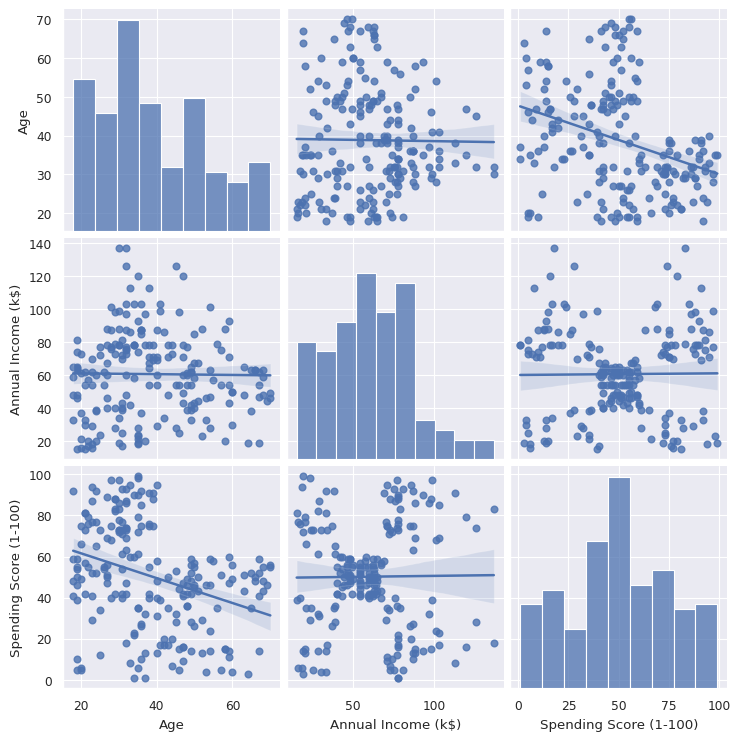

In [16]:
plt.figure(figsize=(7,7))
sns.set_theme(context="paper")
sns.pairplot(customer_dataNew.drop(['CustomerID',"Gender"],axis="columns"),kind="reg",diag_kind="hist")
plt.show()

The **Scatter-Matrix Plot** depicts the following:
 - Histogram of Age, Annual Income Shows slight +ve skewness
 - Spending Score is almost Normally Distributed
 - The Scatter-Plot(s) depict no note-worthy trend between variables concerned.

Note: Further Investigation will be carried out using **Kernel Desity**

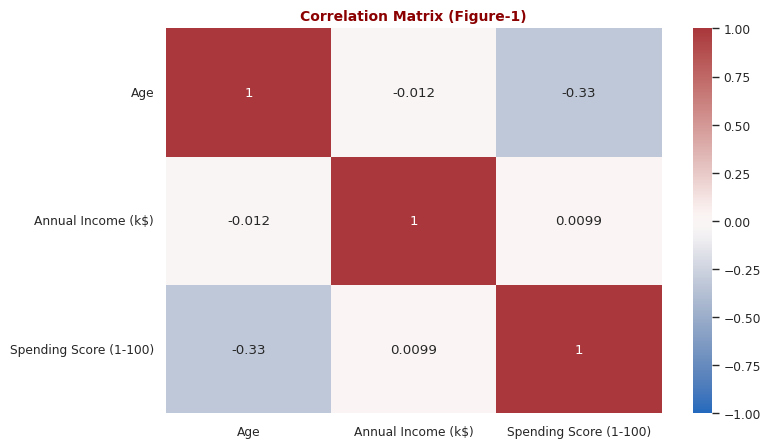

In [17]:
plt.figure(figsize= (8,5))
plt.title("Correlation Matrix (Figure-1)",fontdict=title_font1)
cr = customer_data.drop(["CustomerID","Gender"],axis="columns").corr()
sns.heatmap(cr,annot= True , vmin=-1 ,vmax= 1, center= 0, cmap="vlag")
plt.show()

The above Correlation Matrix depict the following:
- Age Vs. Annual Income
    - Strength of Association is very low (Medium) and indirect
    - With increase in Age, income goes down. (Strength is low, hence not convincing)
- Age Vs. Spending Score
    - Strength of Association is low (highest) and indirect
    - With increase in Age, Spending decreases.
- Annual Income and Spending Score
    - Strength of Association is negligible (lowest) and direct
    - Annual Income and Spending increase-decrease simultaneously. (Strength is low, hence not convincing)


In [18]:
#Let's deep-dive into interaction of more than one variable at a time
inc1 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Male")]["Annual Income (k$)"].mean()
inc2 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Female")]["Annual Income (k$)"].mean()
print(round(inc1,2),inc2)
customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Annual Income (k$)"] >= inc1)]["Gender"].value_counts()

70.79 63.36


Gender
Male      18
Female    13
Name: count, dtype: int64

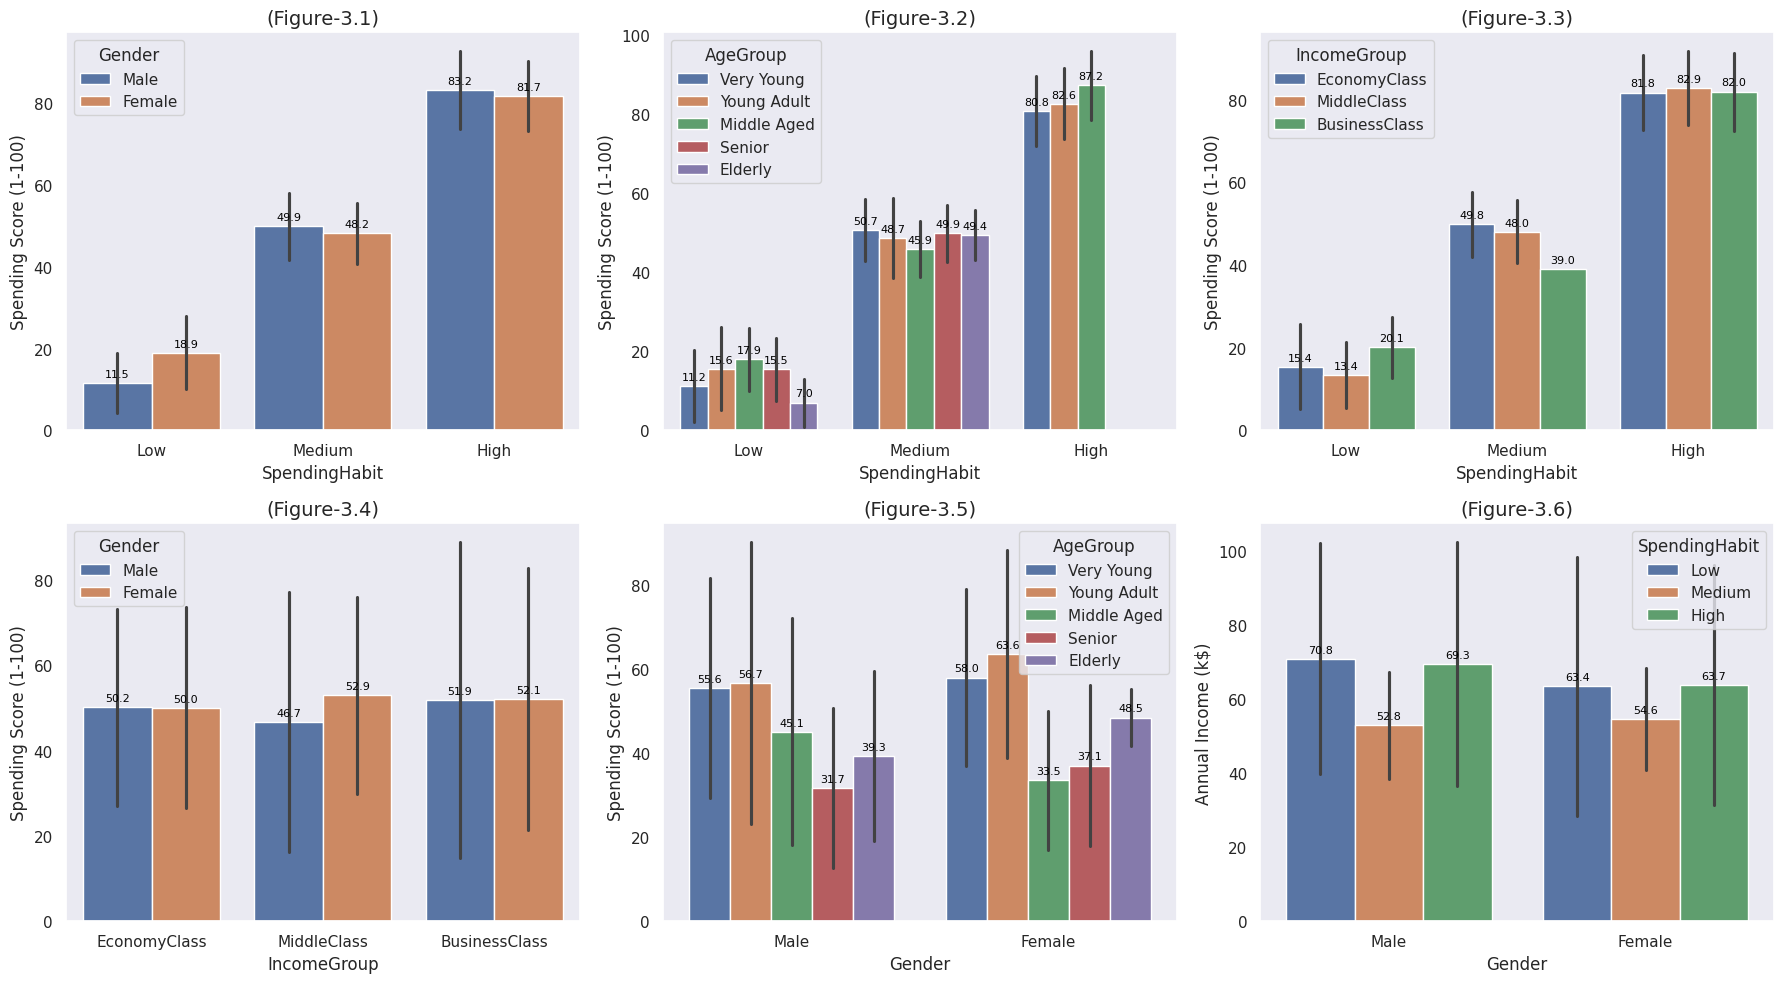

In [19]:
# Set theme
sns.set_theme(style="dark")

# Create combined subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# First row
sns.barplot(data=customer_dataNew, x="SpendingHabit", y="Spending Score (1-100)", hue="Gender", ax=axes[0, 0], errorbar="sd")
axes[0, 0].set_title("(Figure-3.1)", fontsize=14)

sns.barplot(data=customer_dataNew, x="SpendingHabit", y="Spending Score (1-100)", hue="AgeGroup", ax=axes[0, 1], errorbar="sd")
axes[0, 1].set_title("(Figure-3.2)", fontsize=14)

sns.barplot(data=customer_dataNew, x="SpendingHabit", y="Spending Score (1-100)", hue="IncomeGroup", ax=axes[0, 2], errorbar="sd")
axes[0, 2].set_title("(Figure-3.3)", fontsize=14)

# Second row
sns.barplot(data=customer_dataNew, x="IncomeGroup", y="Spending Score (1-100)", hue="Gender", ax=axes[1, 0], errorbar="sd")
axes[1, 0].set_title("(Figure-3.4)", fontsize=14)

sns.barplot(data=customer_dataNew, x="Gender", y="Spending Score (1-100)", hue="AgeGroup", ax=axes[1, 1], errorbar="sd")
axes[1, 1].set_title("(Figure-3.5)", fontsize=14)

sns.barplot(data=customer_dataNew, x="Gender", y="Annual Income (k$)", hue="SpendingHabit", ax=axes[1, 2], errorbar="sd")
axes[1, 2].set_title("(Figure-3.6)", fontsize=14)

# Function to add value labels
def add_value_labels(ax):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if not np.isnan(height):
                ax.annotate(f'{height:.1f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8, color='black')

# Add labels to all subplots
for row in axes:
    for ax in row:
        add_value_labels(ax)

# Improve layout
plt.tight_layout()
plt.show()

|Reference|Observation|
|---------|-----------|
|Figure-3.1|Female in Low Speding Group tends to spend w.r.t their male counterpart (almost twice, on an average). Rest of the group depict almost similar average spending.|
|Figure-3.2|Senior and Elderly Customer tend to avoid high spending. Young(very,adult, middle) drives the business.|
|Figure-3.3|Income Group seems to have equal effect/ no effect as far as Spending Habits are concerned. Medium Speding Business Class have almost zero fluctuation|
|Figure-3.4|Gender coupled with Income Group seem to have equal effect/ no effect as far as Spending Habits are concerned.|
|Figure-3.5|VEry Young, Yound Adults drive the business indeed.|
|Figure-3.6|Similar to Figure 3.1 (As Expected)|



- All three bar-plots shows a common trend i.e. very less affted due to third variable (Gender, Age Group, Income Group)
    - Within Group Standard Deviation is also very similar. Hence `no evidence of specific distinctive insight`.
    - Further Investigation (`Clustering Required`)


In [20]:
#Let's See How these Barplots Work:
inc1 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Male")]["Spending Score (1-100)"].mean()
inc2 = customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Gender"]=="Female")]["Spending Score (1-100)"].mean()
print(round(inc1,2),inc2)
customer_dataNew[(customer_dataNew["SpendingHabit"]=="Low") & (customer_dataNew["Annual Income (k$)"] >= inc1)]["Gender"].value_counts()

11.54 18.92


Gender
Female    25
Male      24
Name: count, dtype: int64

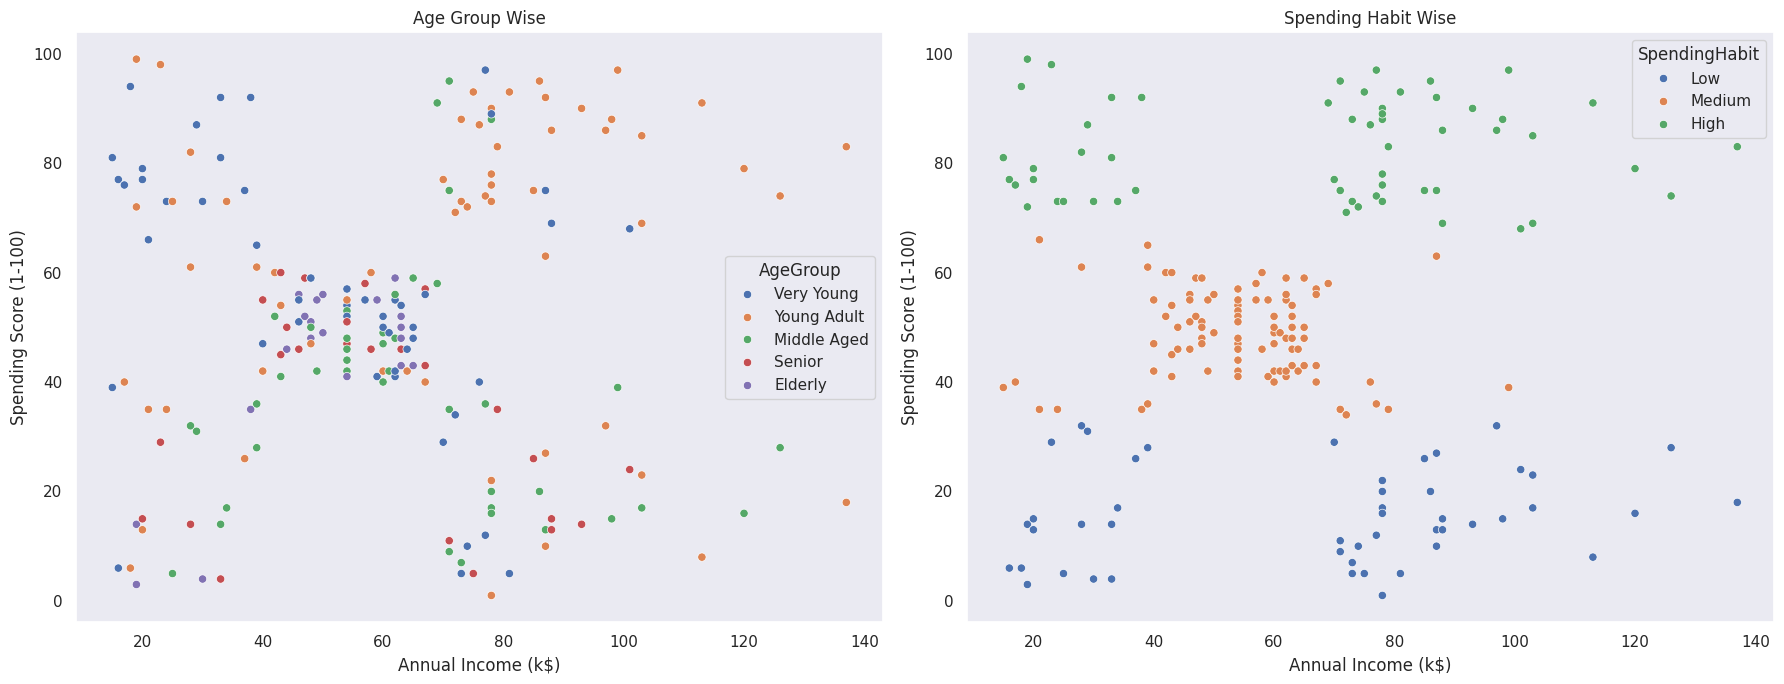

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# First Plot - Age Group Wise
sns.scatterplot(
    data=customer_dataNew,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="AgeGroup",
    ax=axes[0]
)
axes[0].set_title("Age Group Wise")

# Second Plot - Spending Habit Wise
sns.scatterplot(
    data=customer_dataNew,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="SpendingHabit",
    ax=axes[1]
)
axes[1].set_title("Spending Habit Wise")

plt.tight_layout()
plt.show()


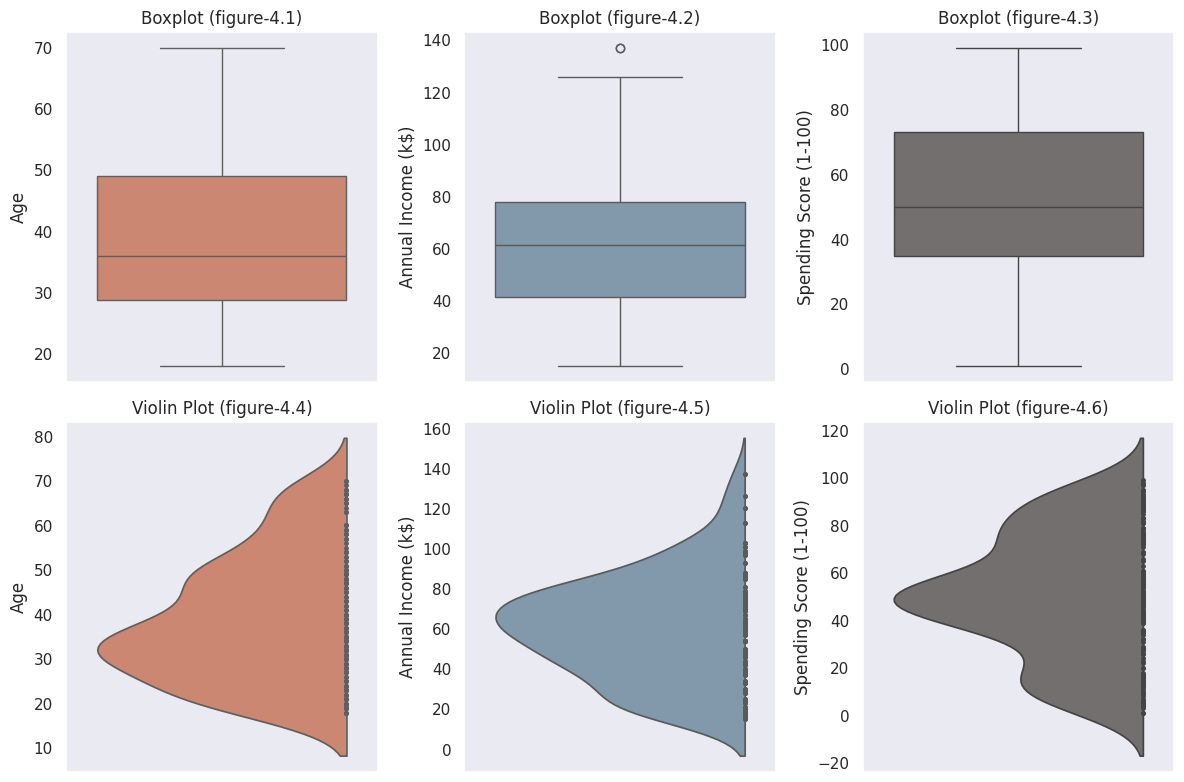

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# First row: Boxplots
sns.boxplot(data=customer_data["Age"], ax=axes[0, 0], color="#DA7F63")
axes[0, 0].set_title("Boxplot (figure-4.1)")

sns.boxplot(data=customer_data["Annual Income (k$)"], ax=axes[0, 1], color="#7B98B2")
axes[0, 1].set_title("Boxplot (figure-4.2)")

sns.boxplot(data=customer_data["Spending Score (1-100)"], ax=axes[0, 2], color="#746f6D")
axes[0, 2].set_title("Boxplot (figure-4.3)")

# Second row: Violin plots
sns.violinplot(data=customer_data["Age"], ax=axes[1, 0],split=True, inner="point", color="#DA7F63")
axes[1, 0].set_title("Violin Plot (figure-4.4)")

sns.violinplot(data=customer_data["Annual Income (k$)"],split=True, inner="point", ax=axes[1, 1], color="#7B98B2")
axes[1, 1].set_title("Violin Plot (figure-4.5)")

sns.violinplot(data=customer_data["Spending Score (1-100)"],split=True, inner="point", ax=axes[1, 2], color="#746f6D")
axes[1, 2].set_title("Violin Plot (figure-4.6)")

plt.tight_layout()
plt.show()


- The above Box-Plot reveals the following:
    - Absence of Outliers (except in Income)

- Violine Plot Shows:
    - The KDEs show almost nomally distributed probality curve

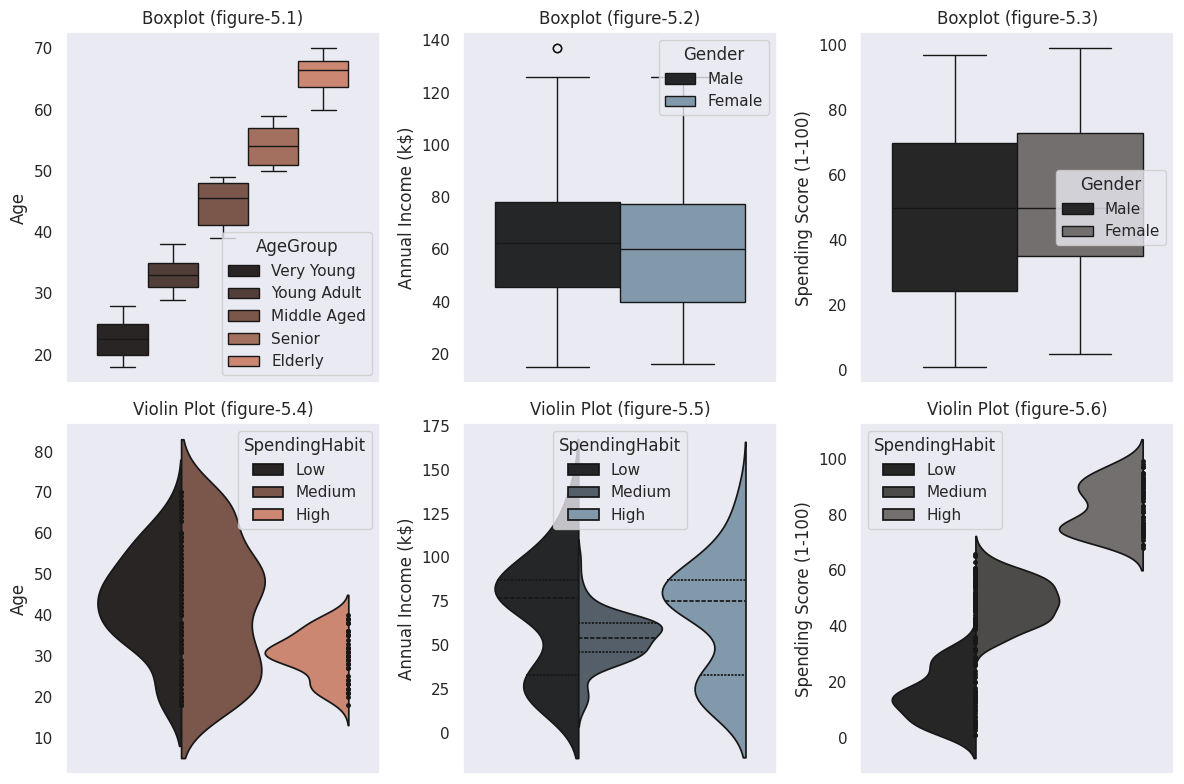

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# First row: Boxplots
sns.boxplot(data=customer_dataNew, y ="Age",hue = "AgeGroup", ax=axes[0, 0], color="#DA7F63")
axes[0, 0].set_title("Boxplot (figure-5.1)")

sns.boxplot(data=customer_dataNew, y="Annual Income (k$)",hue="Gender", ax=axes[0, 1], color="#7B98B2")
axes[0, 1].set_title("Boxplot (figure-5.2)")

sns.boxplot(data=customer_dataNew,y ="Spending Score (1-100)",hue="Gender", ax=axes[0, 2], color="#746f6D")
axes[0, 2].set_title("Boxplot (figure-5.3)")

# Second row: Violin plots
sns.violinplot(data=customer_dataNew,y= "Age",hue="SpendingHabit", ax=axes[1, 0],split=True, inner="point", color="#DA7F63")
axes[1, 0].set_title("Violin Plot (figure-5.4)")

sns.violinplot(data=customer_dataNew,y= "Annual Income (k$)",hue="SpendingHabit",split=True, inner="quart", ax=axes[1, 1], color="#7B98B2")
axes[1, 1].set_title("Violin Plot (figure-5.5)")

sns.violinplot(data=customer_dataNew,y ="Spending Score (1-100)",hue ="SpendingHabit",split=True, inner="point", ax=axes[1, 2], color="#746f6D")
axes[1, 2].set_title("Violin Plot (figure-5.6)")

plt.tight_layout()
plt.show()

- The above Box-Plot reveals the following:
    - Absence of Outliers (except in Income)

- Violine Plot Shows:
    - The KDEs show almost nomally distributed probality curve

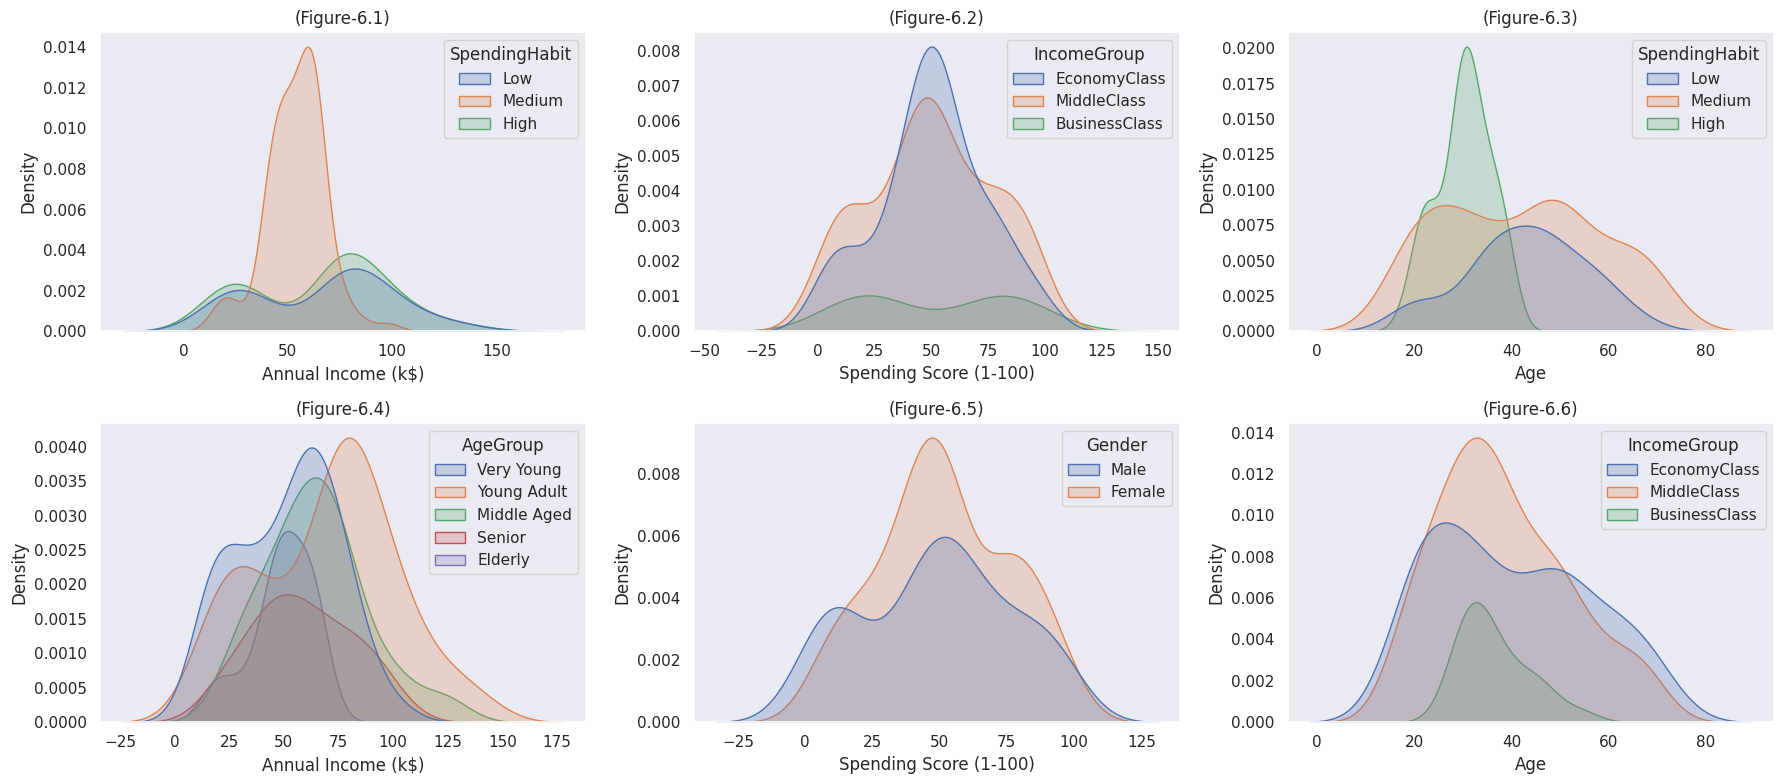

In [24]:
# Create subplots: 1 row, 3 columns, sharing y-axis
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=False)

# Plot KDE for Annual Income
sns.kdeplot(data=customer_dataNew, x="Annual Income (k$)",hue="SpendingHabit", ax=axes[0][0], fill=True, color= "0")
axes[0][0].set_title("(Figure-6.1)")

# Plot KDE for Spending Score
sns.kdeplot(data=customer_dataNew, x="Spending Score (1-100)",hue="IncomeGroup", ax=axes[0][1], fill=True, )
axes[0][1].set_title("(Figure-6.2)")

# Plot KDE for Age
sns.kdeplot(data=customer_dataNew, x="Age",hue="SpendingHabit", ax=axes[0][2], fill=True, color= "purple")
axes[0][2].set_title("(Figure-6.3)")

# Plot KDE for Annual Income
sns.kdeplot(data=customer_dataNew, x="Annual Income (k$)",hue="AgeGroup", ax=axes[1][0], fill=True, color= "0")
axes[1][0].set_title("(Figure-6.4)")

# Plot KDE for Spending Score
sns.kdeplot(data=customer_dataNew, x="Spending Score (1-100)",hue="Gender", ax=axes[1][1], fill=True, )
axes[1][1].set_title("(Figure-6.5)")

# Plot KDE for Age
sns.kdeplot(data=customer_dataNew, x="Age",hue="IncomeGroup", ax=axes[1][2], fill=True, color= "purple")
axes[1][2].set_title("(Figure-6.6)")

# Adjust layout
plt.tight_layout()
plt.show()


Here we created subplots (Kernel Distribution Estimation):
- We can see all the features depict nearly Normal Probability Distribution

### Data Processing

In [25]:
# Let's Treat Outliers ()

def calculateIQR(df,attribute):
    q3 = df[attribute].quantile(0.75)
    q1 = df[attribute].quantile(0.25)
    IQR = q3 - q1
    lower,upper = (q1 - (1.5*IQR) ,q3 + (1.5*IQR))
    return lower,upper

def nolies(entry,lower, upper):
    if ((entry < lower)or (entry > upper)):
        return "out"
    else:
        return "in"

In [26]:
#Let's Check percentage of Outliers Found
customer_Fresh = customer_dataNew.copy() 
lower, upper = calculateIQR(customer_Fresh,"Annual Income (k$)")
customer_Fresh["Outlier"] = customer_Fresh["Annual Income (k$)"].apply(lambda x: nolies(x,lower,upper) )
customer_Fresh["Outlier"].value_counts(normalize=False)


Outlier
in     198
out      2
Name: count, dtype: int64

Note: Based on previous boxplot we found presence of outlier in "Annual Income (k$)". 2 Outliers are found. Let's drop those rows.

In [27]:
#Let's drop the column
customer_Fresh.drop(customer_data[customer_Fresh["Outlier"]== "out"].index,inplace=True)
customer_Fresh.drop(["Outlier"],axis="columns",inplace=True)
customer_Fresh.shape

(198, 8)

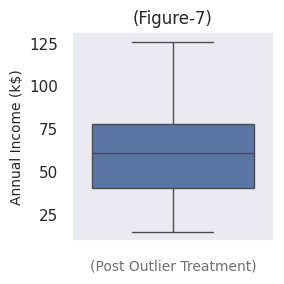

In [28]:
#Let's Verify if Outlier-Treatment
plt.figure(figsize=(3,3))
plt.title("(Figure-7)")
sns.boxplot(data=customer_Fresh, y="Annual Income (k$)",)
plt.ylabel("Annual Income (k$)",  fontsize = 10)
plt.xlabel("(Post Outlier Treatment)", fontsize = 10,color = "#746f6D")

plt.tight_layout()
plt.show()

#### Dummy-Variable (Using get_dummies())
- Concerned Column:
    - `Gender`
    - Note: Excluding `AgeGroup`,  `SpendingHabit`,  `IncomeGroup`. Else then can create multicollinearity in the model.

In [29]:
customer_Fresh.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
0,1,Male,19,15,39,Very Young,Medium,EconomyClass
1,2,Male,21,15,81,Very Young,High,EconomyClass
2,3,Female,20,16,6,Very Young,Low,EconomyClass
3,4,Female,23,16,77,Very Young,High,EconomyClass
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass


In [30]:
customer_Fresh["DummyGender"] = pd.get_dummies(customer_Fresh["Gender"],drop_first= True, dtype="int")
customer_Fresh.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1
1,2,Male,21,15,81,Very Young,High,EconomyClass,1
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0
3,4,Female,23,16,77,Very Young,High,EconomyClass,0
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0


In [31]:
# let's Scale Feature(Age, Annual Income (k$), Spending Score (1-100))
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(customer_Fresh[["Age","Annual Income (k$)","Spending Score (1-100)"]])


### Feature Extraction 

In [32]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
#Taking only last two columns for clustering
X1 = customer_Fresh[["Annual Income (k$)",'Spending Score (1-100)']]
X1.shape

(198, 2)

#### Choosing the Number of Clusters

- `Within Cluster Sum of Squares(WCSS)` - will help us deciding that hyperparameter using elbow plot.
$$
WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} (x_j - \mu_i)^2
$$

In [34]:
#Finding WCSS Value for upto 10 Clusters (Raw Features)
wcss_raw = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans1.fit(X1)
    wcss_raw.append(kmeans1.inertia_)

In [35]:
#Finding WCSS Value for upto 10 Clusters (Scaled Features)
wcss_scaled = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans2.fit(X_Scaled)
    wcss_scaled.append(kmeans2.inertia_)

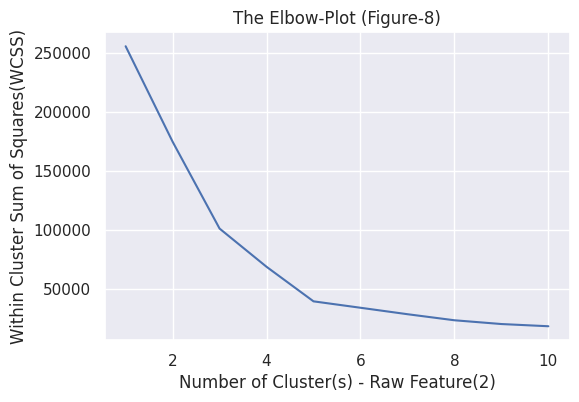

In [36]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss_raw)
plt.title("The Elbow-Plot (Figure-8)")
plt.xlabel("Number of Cluster(s) - Raw Feature(2)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


- The Optimum number of Clusters will be 5

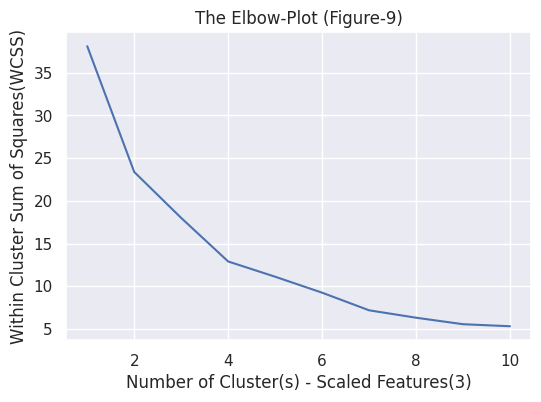

In [37]:
# Creating Elbow-Plot
sns.set_theme()
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss_scaled)
plt.title("The Elbow-Plot (Figure-9)")
plt.xlabel("Number of Cluster(s) - Scaled Features(3)")
plt.ylabel("Within Cluster Sum of Squares(WCSS)")
plt.show()


- The Optimum number of Clusters will be 7

### K-Means Clustering Model Training 

In [38]:
# Finalling fitting the model with 5 Clusters
fitKmeans1 = KMeans(n_clusters=5,init="k-means++",random_state= 0)

In [39]:
# Let's see how each data points are clustered
cluster1 = fitKmeans1.fit_predict(X1)
len(cluster1)

198

In [40]:
# Finalling fitting the model with 5 Clusters
fitKmeans2 = KMeans(n_clusters=7,init="k-means++",random_state= 0)

In [41]:
# Let's see how each data points are clustered
cluster2 = fitKmeans2.fit_predict(X_Scaled)
len(cluster2)

198

### Cluster Visualization

In [42]:
# Incorporating Cluster in the DataFrame
customer_segment1 = customer_Fresh.copy()
customer_segment1["Cluster"] = cluster1
customer_segment1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1,3
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,2
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0,3
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,2
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0,3


In [43]:
customer_segment1["Cluster"].value_counts()

Cluster
0    80
1    38
4    35
3    23
2    22
Name: count, dtype: int64

In [44]:
# Incorporating Cluster in the DataFrame
customer_segment2 = customer_Fresh.copy()
customer_segment2["Cluster"] = cluster2
customer_segment2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
0,1,Male,19,15,39,Very Young,Medium,EconomyClass,1,2
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,6
2,3,Female,20,16,6,Very Young,Low,EconomyClass,0,5
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,6
4,5,Female,31,17,40,Young Adult,Medium,EconomyClass,0,2


In [45]:
customer_segment2["Cluster"].value_counts()

Cluster
1    38
2    34
4    34
3    31
6    22
0    20
5    19
Name: count, dtype: int64

In [46]:
#Let's segregate the data as per cluster
cluster_range1 = range(5)
df01 = customer_segment1.loc[customer_segment1["Cluster"] == 0]
df11 = customer_segment1.loc[customer_segment1["Cluster"] == 1]
df21 = customer_segment1.loc[customer_segment1["Cluster"] == 2]
df31 = customer_segment1.loc[customer_segment1["Cluster"] == 3]
df41 = customer_segment1.loc[customer_segment1["Cluster"] == 4]

In [47]:
#Let's segregate the data as per cluster
cluster_range2 = range(7)
df02 = customer_segment2.loc[customer_segment2["Cluster"] == 0]
df12 = customer_segment2.loc[customer_segment2["Cluster"] == 1]
df22 = customer_segment2.loc[customer_segment2["Cluster"] == 2]
df32 = customer_segment2.loc[customer_segment2["Cluster"] == 3]
df42 = customer_segment2.loc[customer_segment2["Cluster"] == 4]
df52 = customer_segment2.loc[customer_segment2["Cluster"] == 5]
df62 = customer_segment2.loc[customer_segment2["Cluster"] == 6]

In [48]:
df01.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'AgeGroup', 'SpendingHabit', 'IncomeGroup',
       'DummyGender', 'Cluster'],
      dtype='object')

In [49]:
# Segregating Clusters
centroids = fitKmeans1.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

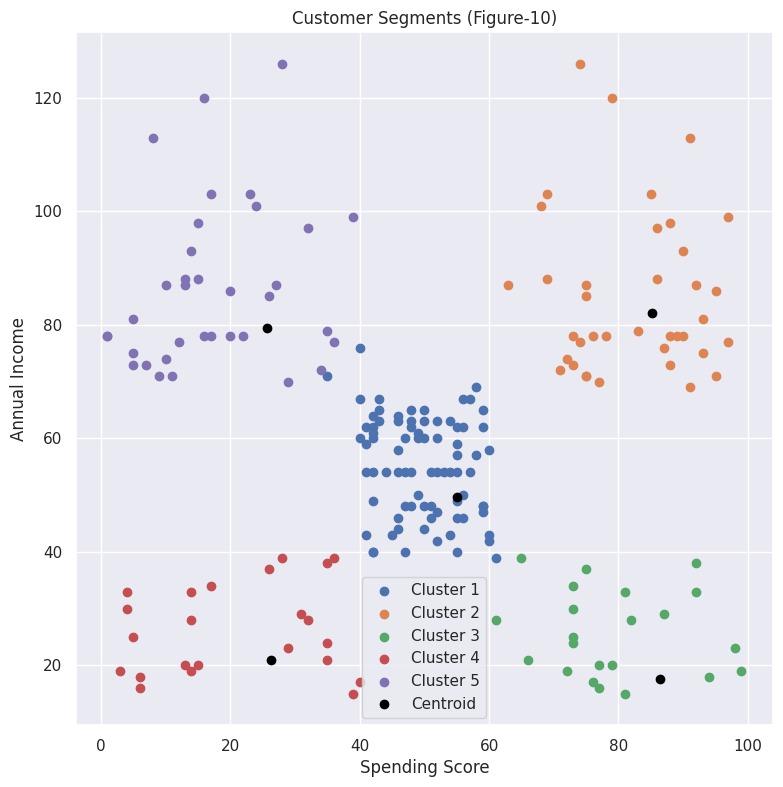

In [50]:
# Creating Cluster Visualization
plt.figure(figsize=(9,9))
plt.title("Customer Segments (Figure-10)")
plt.scatter(df01['Spending Score (1-100)'],df01['Annual Income (k$)'],label="Cluster 1")
plt.scatter(df11['Spending Score (1-100)'],df11['Annual Income (k$)'],label="Cluster 2")
plt.scatter(df21['Spending Score (1-100)'],df21['Annual Income (k$)'],label="Cluster 3")
plt.scatter(df31['Spending Score (1-100)'],df31['Annual Income (k$)'],label="Cluster 4")
plt.scatter(df41['Spending Score (1-100)'],df41['Annual Income (k$)'],label="Cluster 5")
plt.scatter(x_centre,y_centre,c="black", label="Centroid")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

In [51]:
# Segregating Clusters
centroids = fitKmeans2.cluster_centers_
x_centre=[]
y_centre=[]
for i in range(len(centroids)):
    x_centre.append(centroids[i][0])
    y_centre.append(centroids[i][1])

In [52]:
#Let's check dimension of the certroids
centroids.shape

(7, 3)

In [53]:
df62.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup,DummyGender,Cluster
1,2,Male,21,15,81,Very Young,High,EconomyClass,1,6
3,4,Female,23,16,77,Very Young,High,EconomyClass,0,6
5,6,Female,22,17,76,Very Young,High,EconomyClass,0,6
7,8,Female,23,18,94,Very Young,High,EconomyClass,0,6
9,10,Female,30,19,72,Young Adult,High,EconomyClass,0,6


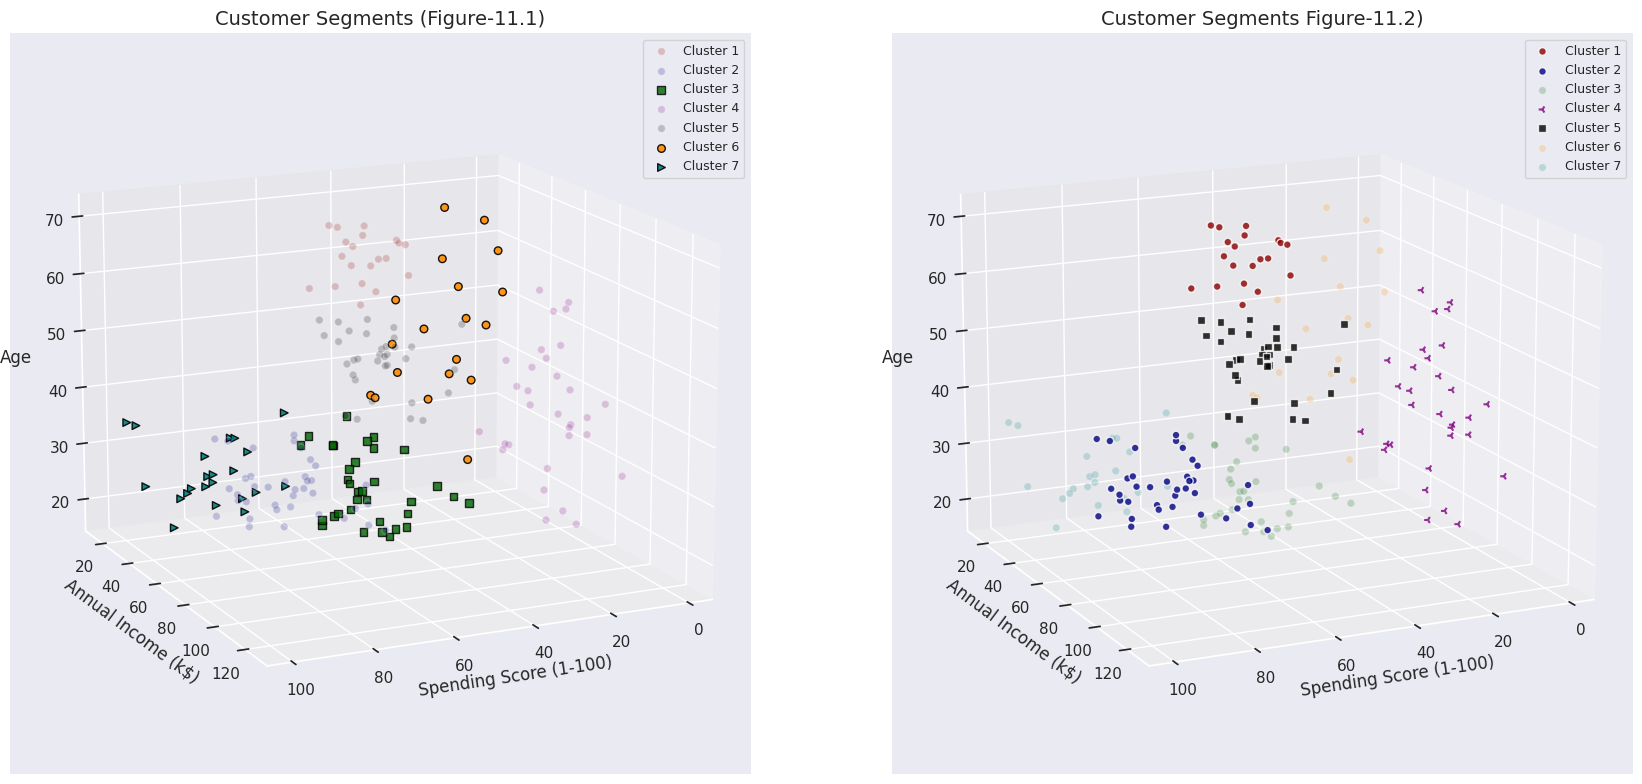

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))  # Wider figure for side-by-side plots

# --- Plot 1 (Left) ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_title("Customer Segments (Figure-11.1)", fontsize=14)
ax1.set_xlabel("Spending Score (1-100)")
ax1.set_ylabel("Annual Income (k$)")
ax1.set_zlabel("Age", labelpad=10)
ax1.view_init(elev=15, azim=65)

# Cluster plot (plot A)
ax1.scatter(df02['Spending Score (1-100)'], df02['Annual Income (k$)'], df02['Age'],
            label="Cluster 1", c='darkred', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df12['Spending Score (1-100)'], df12['Annual Income (k$)'], df12['Age'],
            label="Cluster 2", c='navy', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df22['Spending Score (1-100)'], df22['Annual Income (k$)'], df22['Age'],
            label="Cluster 3", c='darkgreen', s=30, alpha=0.8, edgecolors='black',marker="s")
ax1.scatter(df32['Spending Score (1-100)'], df32['Annual Income (k$)'], df32['Age'],
            label="Cluster 4", c='purple', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df42['Spending Score (1-100)'], df42['Annual Income (k$)'], df42['Age'],
            label="Cluster 5", c='black', s=30, alpha=0.2, edgecolors='white')
ax1.scatter(df52['Spending Score (1-100)'], df52['Annual Income (k$)'], df52['Age'],
            label="Cluster 6", c='darkorange', s=30, alpha=0.9, edgecolors='black',marker="o")
ax1.scatter(df62['Spending Score (1-100)'], df62['Annual Income (k$)'], df62['Age'],
            label="Cluster 7", c='teal', s=30, alpha=0.9, edgecolors='black',marker=">")
ax1.legend(loc='upper right', fontsize=9)

# --- Plot 2 (Right) ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title("Customer Segments Figure-11.2)", fontsize=14)
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")
ax2.set_zlabel("Age", labelpad=10)
ax2.view_init(elev=15, azim=65)

# Cluster plot (plot B)
ax2.scatter(df02['Spending Score (1-100)'], df02['Annual Income (k$)'], df02['Age'],
            label="Cluster 1", c='darkred', s=30, alpha=0.8, edgecolors='white')
ax2.scatter(df12['Spending Score (1-100)'], df12['Annual Income (k$)'], df12['Age'],
            label="Cluster 2", c='navy', s=30, alpha=0.8, edgecolors='white')
ax2.scatter(df22['Spending Score (1-100)'], df22['Annual Income (k$)'], df22['Age'],
            label="Cluster 3", c='darkgreen', s=30, alpha=0.2, edgecolors='white')
ax2.scatter(df32['Spending Score (1-100)'], df32['Annual Income (k$)'], df32['Age'],
            label="Cluster 4", c='purple', s=30, alpha=0.8, edgecolors='white',marker="3")
ax2.scatter(df42['Spending Score (1-100)'], df42['Annual Income (k$)'], df42['Age'],
            label="Cluster 5", c='black', s=30, alpha=0.8, edgecolors='white',marker="s")
ax2.scatter(df52['Spending Score (1-100)'], df52['Annual Income (k$)'], df52['Age'],
            label="Cluster 6", c='darkorange', s=30, alpha=0.2, edgecolors='white')
ax2.scatter(df62['Spending Score (1-100)'], df62['Annual Income (k$)'], df62['Age'],
            label="Cluster 7", c='teal', s=30, alpha=0.2, edgecolors='white')
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


**Note:**
- Here we have not included centroids for two reasons as follows:
    - Centroids are 3-Dimensional Vectors
    - They are computed on scaled-features

### Marketing Decision Framework


| **Decision Area** | **Actions** |
|-------------------|-------------|
| **Segmentation**  | * Identification of various bases for dividing the market<br>* Developing profiles of the marketing segments |
| **Targeting**     | * Evaluating the market segment for their attractiveness<br>* Deciding the market coverage strategy |
| **Positioning**   | * Identifying a set of possible competitive advantages of the brand<br>* Selecting the right competitive advantage<br>* Communicating the chosen competitive advantage to the target customers |


#### Interactive Visualization of 3D Clusters using Plotly

In [55]:
# Create traces for each cluster
trace0 = go.Scatter3d(
    x=df02['Spending Score (1-100)'],
    y=df02['Annual Income (k$)'],
    z=df02['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 1'
)

trace1 = go.Scatter3d(
    x=df12['Spending Score (1-100)'],
    y=df12['Annual Income (k$)'],
    z=df12['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 2'
)

trace2 = go.Scatter3d(
    x=df22['Spending Score (1-100)'],
    y=df22['Annual Income (k$)'],
    z=df22['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 3'
)

trace3 = go.Scatter3d(
    x=df32['Spending Score (1-100)'],
    y=df32['Annual Income (k$)'],
    z=df32['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 4'
)

trace4 = go.Scatter3d(
    x=df42['Spending Score (1-100)'],
    y=df42['Annual Income (k$)'],
    z=df42['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 5'
)

trace5 = go.Scatter3d(
    x=df52['Spending Score (1-100)'],
    y=df52['Annual Income (k$)'],
    z=df52['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 6'
)

trace6 = go.Scatter3d(
    x=df62['Spending Score (1-100)'],
    y=df62['Annual Income (k$)'],
    z=df62['Age'],
    mode='markers',
    marker=dict(size=5),
    name='Cluster 7'
)

# Combine all traces
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Layout configuration
layout = go.Layout(
    title='Customer Segments (Figure-12)',
    scene=dict(
        xaxis_title='Spending Score',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(x=0, y=1)
)

# Plot figure
fig = go.Figure(data=data, layout=layout)
fig.show()


#### Segmentation Analysis
- In this section, we shall filter out each cluster `(Income-Spending-Age)`.
- We shall dive deep, we fetch unique insights about each clusters.

In [56]:
#First let's see how many datapoints each cluster has
start = 1
for i,j in zip(customer_segment2["Cluster"].value_counts(), customer_segment2["Cluster"].value_counts(normalize=True)):
    print(f'Cluster {start} : Count={i} Percentage = {round(j*100,2)}')
    start += 1

Cluster 1 : Count=38 Percentage = 19.19
Cluster 2 : Count=34 Percentage = 17.17
Cluster 3 : Count=34 Percentage = 17.17
Cluster 4 : Count=31 Percentage = 15.66
Cluster 5 : Count=22 Percentage = 11.11
Cluster 6 : Count=20 Percentage = 10.1
Cluster 7 : Count=19 Percentage = 9.6


In [57]:
#Let's crete separate dataframes for each cluster (Dropped ["DummyGender","Cluster"] columns )
customer_cls1 = customer_segment2[customer_segment2["Cluster"]==0].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls2 = customer_segment2[customer_segment2["Cluster"]==1].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls3 = customer_segment2[customer_segment2["Cluster"]==2].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls4 = customer_segment2[customer_segment2["Cluster"]==3].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls5 = customer_segment2[customer_segment2["Cluster"]==4].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls6 = customer_segment2[customer_segment2["Cluster"]==5].drop(["DummyGender","Cluster"],axis= "columns")
customer_cls7 = customer_segment2[customer_segment2["Cluster"]==6].drop(["DummyGender","Cluster"],axis= "columns")

In [58]:
customer_cls1.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,SpendingHabit,IncomeGroup
40,41,Female,65,38,35,Elderly,Medium,EconomyClass
53,54,Male,59,43,60,Senior,Medium,EconomyClass


#### Cluster-Wise Analysis
- In this section we presented the follwing consolidated summary statistics:
    - Depiction of individual cluster-wise `Mean, Median, Standard Deviation, Max` throught grouped-barplot
    - Depiction of individual cluster-wise `Correlation-Matrix` throught heatmap

In [59]:
# Initializing DataFrames with Individual Summary Statistics
desc1 = customer_cls1.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc2 = customer_cls2.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc3 = customer_cls3.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc4 = customer_cls4.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc5 = customer_cls5.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc6 = customer_cls6.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]
desc7 = customer_cls7.describe().loc[["mean","50%","std","max"],["Age",	"Annual Income (k$)","Spending Score (1-100)"]]

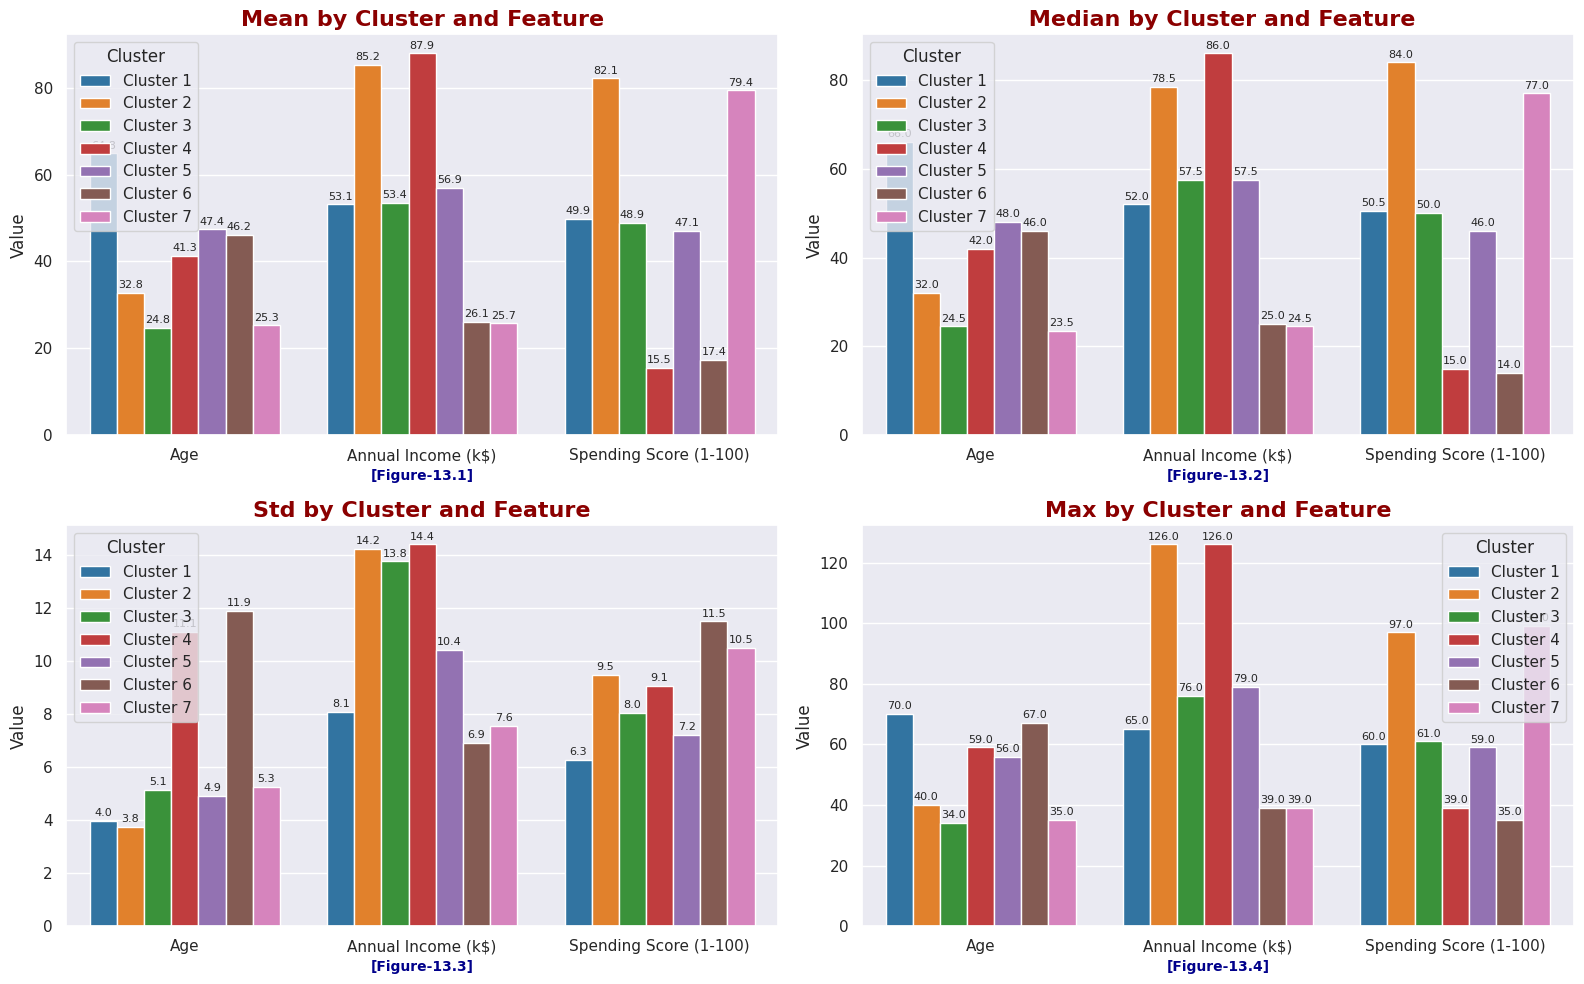

In [60]:
title_font1 = {'fontsize': 16,  # You can adjust the size here
              'fontweight': 'bold', # Optional: You can also set other font properties
              'color': 'darkred'}

title_font2 = {'fontsize': 10,  # You can adjust the size here
              'fontweight': 'bold', # Optional: You can also set other font properties
              'color': 'darkblue'}

# Prepare the description data
desc_list = []
for i, desc in enumerate([desc1, desc2, desc3, desc4, desc5, desc6, desc7], start=1):
    df = desc.copy()
    df["Cluster"] = f"Cluster {i}"
    df["Statistic"] = df.index
    desc_list.append(df)

# Combine and melt the data
combined_desc = pd.concat(desc_list)
melted = combined_desc.melt(id_vars=["Cluster", "Statistic"], var_name="Feature", value_name="Value")

# Set seaborn style
sns.set_theme("paper")
sns.set(style="darkgrid")

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
stat_order = ["mean", "50%", "std", "max"]
axes = axes.flatten()

for idx, stat in enumerate(stat_order):
    ax = axes[idx]
    subset = melted[melted["Statistic"] == stat]
    barplot = sns.barplot(
        data=subset,
        x="Feature",
        y="Value",
        hue="Cluster",
        ax=ax,
        palette="tab10"
    )
    if stat == "50%":
        ax.set_title(f" Median by Cluster and Feature",fontdict=title_font1)
    else:
        ax.set_title(f"{stat.capitalize()} by Cluster and Feature",color="darkred",fontdict=title_font1)
    ax.set_xlabel(f'[Figure-13.{idx+1}]',fontdict=title_font2)
    ax.set_ylabel("Value")
    ax.legend().set_title("Cluster")

    # Annotate values
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=8, padding=2)
plt.tight_layout()
plt.show()


### The above consolidated grouped-barplot depicts the following:

| **Features**   | **Central Tendency**                                                                                                                                                                                                                   | **Measure of Dispersion**                                                                                                              |
|----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| **Age**        | * `Cluster-1`: Demography is the `oldest` (*Median – 66 years*)  <br><br> * `Cluster-7`: Demography is the `youngest` (*Median – 23.5 years*)                                                                                        | * `Cluster-4`, `Cluster-6` show high fluctuation in age distribution (twice as much as the rest)                                      |
| **Income**     | * `Cluster-1, 3, 5`: Exhibit `Middle-Class` behavioural patterns  <br><br> * `Cluster-2, 4`: Exhibit `Business-Class` behavioural patterns  <br><br> * `Cluster-6, 7`: Exhibit `Economy-Class` behavioural patterns                      | * `Cluster-2, 3, 4`: Exhibit high fluctuations in income  <br><br> * `Cluster-1, 6, 7`: Have relatively lower within-group fluctuations |
| **Spending**   | * `Cluster-1 (lowest)`, `Cluster-3`, `Cluster-5`: These customer segments have `moderate-spending habits`  <br><br> * `Cluster-4, 6`: Spending habit is the `lowest` (one-third of moderate cluster)  <br><br> * `Cluster-2 (highest)`, `Cluster-7`: Spending habit is `very high` | * `Cluster-1, 3, 5`: Exhibit comparatively lower fluctuation in spending habits  <br><br> * `Cluster-4, 6`: Lowest spending with highest fluctuation (`C.V. of 82.14%`)     |


In [61]:
# Initializing DataFrames with Individual Correlation Matrix
corr1 = customer_cls1[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr2 = customer_cls2[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr3 = customer_cls3[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr4 = customer_cls4[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr5 = customer_cls5[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr6 = customer_cls6[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()
corr7 = customer_cls7[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr()

In [62]:
#Let's accumulate correlation value from each cluster in a diction
corr_list = [corr1, corr2, corr3, corr4, corr5, corr6, corr7]
entity_list = ["Age","Income","Spending"]
cluster_dict = {}


for idx,element in enumerate(corr_list):
    score_list = []
    for i in range(3):
        for j in range(3):
            if(i != j and i > j):
                # print(f'{entity_list[i]},{entity_list[j]}- [Cluster-{idx+1}]: {element.iloc[i,j]}')
                score_list.append(round(element.iloc[i,j],2))
    cluster_dict[f'Cluster-{idx+1}'] = score_list

In [63]:
#Create a Dataframe of All Clustered-Correlation Scores
index_list = ["Income Vs. Age", "Spending Vs. Age", "Spending Vs. Income"]
cluster_corr = pd.DataFrame(data=cluster_dict,index= index_list)
cluster_corr.head()

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5,Cluster-6,Cluster-7
Income Vs. Age,0.05,-0.08,-0.25,0.14,-0.11,0.09,-0.11
Spending Vs. Age,-0.07,0.14,0.05,0.19,0.12,-0.28,0.08
Spending Vs. Income,0.02,-0.05,-0.09,0.47,-0.21,0.24,-0.11


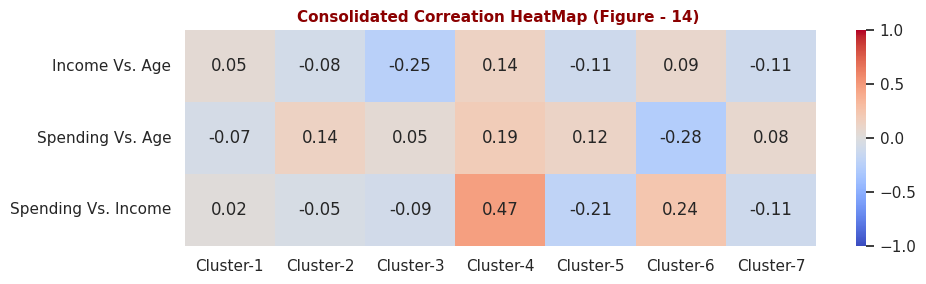

In [64]:
# Consolidated Correation HeatMaps
title_font1 = {'fontsize': 11,  # You can adjust the size here
              'fontweight': 'bold', # Optional: You can also set other font properties
              'color': 'darkred'}

title_font2 = {'fontsize': 8,  # You can adjust the size here
              'fontweight': 'bold', # Optional: You can also set other font properties
              'color': 'darkblue'}

plt.figure(figsize=(10,3))
plt.title("Consolidated Correation HeatMap (Figure - 14) ",fontdict= title_font1)
sns.heatmap(cluster_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### The above consolidated correlation heatmap depicts the following:

| **Clusters →**          | **Direct (+ve)**       | **Indirect (–ve)**       | **Special Observation**          |
|-------------------------|------------------------|---------------------------|----------------------------------|
| **Income vs. Age**      | Cluster-4              | Cluster-3, 5, 7           | Cluster-3 [–0.25]                |
| **Spending vs. Age**    | Cluster-2, 4, 5        | Cluster-6                 | Cluster-6 [–0.28]                |
| **Spending vs. Income** | Cluster-4, 6           | Cluster-5, 7              | Cluster-4 [0.47]                 |

**Note:** Correlation values < 0.1 are considered as zero.

- `Cluster-1` is mostly uncorrelated with all existing features. Assumably, they will continue to function without any intervention and create business.

- `Cluster-6` (Lowest Income Group but the Steadiest): With increasing Age, Spending decreases. While with increasing Income, Spending increases. Income and Age seem to be uncorrelated.

- `Cluster-4` (Business Class but the fluctuating income): Income, Age, and Spending increase alongside. Correlation between Income and Spending is highest.

- `Cluster-5, 7` (–ve income effect): Depicts inverse relationship between Income and Spending, i.e., with increase in income, spending decreases.

- `Cluster-2`: Exhibits increase in spending with increase in Age.


#### Is it Statitically Significant/ Random Chance?

<!-- 
* **Null Hypothesis ($H_0$):** The population correlation coefficient ($\rho$) is zero. This means there is no linear relationship between Income and Expenditure in the population. Mathematically, this is expressed as:
    $$H_0: \rho = 0$$
    $$H_a: \rho > 0$$ 

* **Determine the Test Statistic:**

For testing the significance of a Pearson correlation coefficient ($r$), the test statistic follows a t-distribution with $n-2$ degrees of freedom, where $n$ is the sample size. The formula for the t-statistic is:

$$t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}}$$

Where:
* $t$ is the calculated t-statistic.
* $r$ is the sample Pearson correlation coefficient (in your case, $r = 0.45$).
* $n$ is the sample size. -->

* **Null Hypothesis ($H_0$):** The population correlation coefficient ($\rho$) is zero. This means there is no linear relationship between variables concerned in the population. Mathematically, this is expressed as:
    $$H_0: \rho = 0$$
    $$H_a: \rho > 0$$ 

In [65]:
# Defining the One-Tailed Tests (Right)

def test_correlation_posistive(income, expenditure, alpha=0.05):
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(income, expenditure, alternative="greater")

    print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level (alpha): {alpha}")

    # Make a decision based on the p-value and alpha
    if p_value <= alpha:
        decision = "Reject the null hypothesis. There is statistically significant evidence of a linear relationship."
    else:
        decision = "Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship."

    return correlation_coefficient, p_value, decision


* **Null Hypothesis ($H_0$):** The population correlation coefficient ($\rho$) is zero. This means there is no linear relationship between variables concerned in the population. Mathematically, this is expressed as:
    $$H_0: \rho = 0$$
    $$H_a: \rho < 0$$ 

In [66]:
# Defining the One-Tailed Tests (Left)

def test_correlation_negative(income, expenditure, alpha=0.05):
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(income, expenditure, alternative="less")

    print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level (alpha): {alpha}")

    # Make a decision based on the p-value and alpha
    if p_value <= alpha:
        decision = "Reject the null hypothesis. There is statistically significant evidence of a linear relationship."
    else:
        decision = "Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship."

    return correlation_coefficient, p_value, decision


In [67]:
# Let's Test  for Cluster-4 (Spending Vs. Income)

income_data = customer_cls4["Annual Income (k$)"]
spending_data = customer_cls4["Spending Score (1-100)"]

correlation, p_value, conclusion = test_correlation_posistive(income_data, spending_data)
print("\nConclusion:")
print(conclusion)

Pearson Correlation Coefficient (r): 0.4739
P-value: 0.0035
Significance Level (alpha): 0.05

Conclusion:
Reject the null hypothesis. There is statistically significant evidence of a linear relationship.


There exist statistically significant `positive(+ve) association` between `Income and Spending` for `Cluster-4`

In [68]:
# Let's Test  for Cluster-4 (Spending Vs. Age)

age_data = customer_cls4["Age"]
spending_data = customer_cls4["Spending Score (1-100)"]

correlation, p_value, conclusion = test_correlation_posistive(age_data, spending_data)
print("\nConclusion:")
print(conclusion)

Pearson Correlation Coefficient (r): 0.1852
P-value: 0.1592
Significance Level (alpha): 0.05

Conclusion:
Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship.


In [69]:
# Let's Test  for Cluster-6 (Spending Vs. Income)

income_data = customer_cls6["Annual Income (k$)"]
spending_data = customer_cls6["Spending Score (1-100)"]

correlation, p_value, conclusion = test_correlation_posistive(income_data, spending_data)
print("\nConclusion:")
print(conclusion)

Pearson Correlation Coefficient (r): 0.2423
P-value: 0.1587
Significance Level (alpha): 0.05

Conclusion:
Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship.


`No evidence` of statistically significant correlation between `Income and Spending` for `Cluster-6`

In [70]:
# Let's Test  for Cluster-6 (Spending Vs. Age)

age_data = customer_cls6["Age"]
spending_data = customer_cls6["Spending Score (1-100)"]

correlation, p_value, conclusion = test_correlation_negative(age_data, spending_data)
print("\nConclusion:")
print(conclusion)

Pearson Correlation Coefficient (r): -0.2777
P-value: 0.1248
Significance Level (alpha): 0.05

Conclusion:
Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship.


`No evidence` of statistically significant correlation between `Income and Age` for `Cluster-6`

In [71]:
# Let's Test  for Cluster-5 (Spending Vs. Income)

income_data = customer_cls5["Age"]
spending_data = customer_cls5["Spending Score (1-100)"]

correlation, p_value, conclusion = test_correlation_negative(income_data, spending_data)
print("\nConclusion:")
print(conclusion)

Pearson Correlation Coefficient (r): 0.1171
P-value: 0.7452
Significance Level (alpha): 0.05

Conclusion:
Fail to reject the null hypothesis. There is not enough statistically significant evidence of a linear relationship.


`No evidence` of statistically significant correlation between `Income and Spending` for `Cluster-5`

#### If Yes, Then By How Much??
- In this Section we shall develop a simple `Log-Log Regression Model` (Income-Spending)
- Fecth information about `elasticity` of Spending Habits.
- We shall make inferferece on `Income-Consumption hypothesis` for each cluster and sample as a whole through Hypothesis Testing
- Try to understand +ve and -ve income effect.

In [72]:
# Log-transform the variables
X = np.log(customer_cls4[["Annual Income (k$)"]])
Y = np.log(customer_cls4[["Spending Score (1-100)"]])

# Add a constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X)
result = model.fit()

# Print structured summary
print(result.summary())


                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.193
Model:                                OLS   Adj. R-squared:                  0.165
Method:                     Least Squares   F-statistic:                     6.942
Date:                    Mon, 05 May 2025   Prob (F-statistic):             0.0134
Time:                            01:08:38   Log-Likelihood:                -35.288
No. Observations:                      31   AIC:                             74.58
Df Residuals:                          29   BIC:                             77.44
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

##### `Log-Log Regression Model` Suggest the Following :
- Overall Model Addequacy (`Prob (F-statistic) < 0.05`): Hence Null Hypothesis (all coefficients are zero) is rejected.
- The featured (Logarithmic Transformation) log-log model can explain 16.5% of the total variation in spending score (`Adj. R-squared = 0.165`).
- `Log(Annual Income)` has found to be a significant predictor (`P>|t| = 0.013`).
-  Final Thought: **1 % increase** in `Annual Income` may lead to **2.42 % increase** in `Avg. Spending Score`.
- **Why didn't not include "Age"??** --> Although (Null Hypothesis Got Rejected), Let's reverify it by including the variable next.

In [73]:
# Log-transform the variables (Including "Age" Variable)
X = np.log(customer_cls4[["Annual Income (k$)","Age"]])
Y = np.log(customer_cls4[["Spending Score (1-100)"]])

# Add a constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X)
result = model.fit()

# Print structured summary
print(result.summary())


                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.230
Model:                                OLS   Adj. R-squared:                  0.175
Method:                     Least Squares   F-statistic:                     4.189
Date:                    Mon, 05 May 2025   Prob (F-statistic):             0.0256
Time:                            01:08:38   Log-Likelihood:                -34.557
No. Observations:                      31   AIC:                             75.11
Df Residuals:                          28   BIC:                             79.42
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Added "Age" as another predictor and run the analysis. We found:
- `"Age"` to be `insignificant as predictor` of "Spending Score" for `cluster-4` (Refer to Hypothesis Testing Section)

- Refer to `P>|t| = 0.255` : Suggests, fail to reject the Null Hypothesis i.e. predictor is insignificant.

<!-- #### Statistical Inference and Regression Analysis
- In this Section we shall develop a simple `Log-Log Regression Model` (Income-Spending)
- Fecth information about `elasticity` of Spending Habits.
- We shall make inferferece on `Income-Consumption hypothesis` for each cluster and sample as a whole through Hypothesis Testing
- Try to understand +ve and -ve income effect. -->

<!-- Here is the Report:
- In this Section we shall develop a simple Log-Log Regression Model (Income-Spending)
- Fecth information about elasticity of Spending Habits.
- We shall make inferferece on Income-Consumption hypothesis for each cluster and sample as a whole through Hypothesis Testing
- Try to understand +ve and -ve income effect. -->

Overall Flow of the Analytics Project:
1. `Ask + Prepare`: Data taken from Kaggle
2. `Process`: Exploratory Data Analysis
3. `Process`:Data Processing and Feature Engineering
4. `Analyse`: Clustering with K-Means
5. `Analyze`: Dived deep into individual clusters
6. `Analyze`: Statistical Inference and Hypothesis Testing
7. `Share + Act`: Closing Remarks 

###### Include **Data Analysis Lifecycle** (Ask-Prepare-Process-Analyze-Share-Act)